<a href="https://colab.research.google.com/github/Victorrani/applied-programming-exercises/blob/main/Ex_quimica_atmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Exercício 8 da Lista de Química Atmosferica.
A tabela foi disponibilizada em arquivo xls. Foram utilizadas as bibliotecas do python:

*   Pandas (analise de dados)
*   Numpy (operações matemáticas)
*   Matplotlib (gráficos)

Etapas:


1.   Transformou o arquivo xls em Pandas
2.   Conversão de unidades e nome das colunas
3.   Cálculo das colunas em branco (03 ppb)
4.   Definição do valor de H como sendo 7,5 Km
5.   Cálculo de z (km)
6.   Plot dos gráficos todos juntos 

Obs: Utilizamos o eixo X como sendo altura (kM), Dessa forma, conseguimos colocar as variáveis, Temperatura, Pressão e Concentração no eixo Y.
Obs2: Não gostamos do eixo Y da direita no nosso gráfico. Não conseguimos deixar bonito.







In [ ]:
arquivo = '/content/drive/MyDrive/Dados-exercício_Perfil_-vertical-Ozonio_ACA0410-2023.xls'
df = pd.read_excel(arquivo, skiprows=2)
df.head()

,Pressao (hPA),temp(oC),PO3 (nbar),H (km),z (km),O3 (ppb)
0,935.25,18.35,18.05,NaN,NaN,NaN
1,924.96,16.63,20.06,NaN,NaN,NaN
2,914.11,15.77,20.05,NaN,NaN,NaN
3,903.60,14.59,20.62,NaN,NaN,NaN
4,893.36,13.73,21.43,NaN,NaN,NaN


In [ ]:
#Fazendo as mudanças de unidade de medida

## nbar para mbar 
df['PO3 (nbar)'] = (df['PO3 (nbar)'] / 10**(6))
df.rename(columns={'PO3 (nbar)': 'PO3 (mbar)'}, inplace = True)
## hPa para mbar 
df.rename(columns={'Pressao (hPA)': 'Pressao (mbar)'}, inplace = True)
## °C para K
df['temp(oC)'] = df['temp(oC)'] + 273.15
df.rename(columns={'temp(oC)': 'temp(K)'}, inplace = True)

In [ ]:
df.head()

,Pressao (mbar),temp(K),PO3 (mbar),H (km),z (km),O3 (ppb)
0,935.25,291.50,0.000018,NaN,NaN,NaN
1,924.96,289.78,0.000020,NaN,NaN,NaN
2,914.11,288.92,0.000020,NaN,NaN,NaN
3,903.60,287.74,0.000021,NaN,NaN,NaN
4,893.36,286.88,0.000021,NaN,NaN,NaN


In [ ]:
##encontrando a razão de mistura de ozonio

df['O3 (ppb)'] = df['PO3 (mbar)'] / df['Pressao (mbar)'] * 1000000000

In [ ]:
df.head()


,Pressao (mbar),temp(K),PO3 (mbar),H (km),z (km),O3 (ppb)
0,935.25,291.50,0.000018,NaN,NaN,19.299652
1,924.96,289.78,0.000020,NaN,NaN,21.687424
2,914.11,288.92,0.000020,NaN,NaN,21.933903
3,903.60,287.74,0.000021,NaN,NaN,22.819832
4,893.36,286.88,0.000021,NaN,NaN,23.988090


In [ ]:
df.describe()

,Pressao (mbar),temp(K),PO3 (mbar),H (km),z (km),O3 (ppb)
count,350.000000,350.000000,350.000000,0.0,0.0,350.000000
mean,213.228229,228.559200,0.000053,NaN,NaN,1976.275739
std,243.829782,24.974396,0.000043,NaN,NaN,2792.662699
min,10.160000,199.110000,0.000012,NaN,NaN,19.299652
25%,32.435000,208.892500,0.000017,NaN,NaN,47.498697
50%,99.145000,220.650000,0.000027,NaN,NaN,173.797862
75%,318.597500,237.737500,0.000092,NaN,NaN,3499.768631
max,935.250000,291.500000,0.000137,NaN,NaN,8169.253511


In [ ]:
df['H (km)'] = 7.5

In [ ]:
pi = np.log(df['Pressao (mbar)']) 

In [ ]:
df['z (km)'] = (pi - np.log(1013)) * ((df['H (km)'] * -1))
df.head()

,Pressao (mbar),temp(K),PO3 (mbar),H (km),z (km),O3 (ppb)
0,935.25,291.50,0.000018,7.5,0.598932,19.299652
1,924.96,289.78,0.000020,7.5,0.681908,21.687424
2,914.11,288.92,0.000020,7.5,0.770404,21.933903
3,903.60,287.74,0.000021,7.5,0.857135,22.819832
4,893.36,286.88,0.000021,7.5,0.942614,23.988090


In [ ]:
df

,Pressao (mbar),temp(K),PO3 (mbar),H (km),z (km),O3 (ppb)
0,935.25,291.50,0.000018,7.5,0.598932,19.299652
1,924.96,289.78,0.000020,7.5,0.681908,21.687424
2,914.11,288.92,0.000020,7.5,0.770404,21.933903
3,903.60,287.74,0.000021,7.5,0.857135,22.819832
4,893.36,286.88,0.000021,7.5,0.942614,23.988090
...,...,...,...,...,...,...
345,10.68,231.47,0.000085,7.5,34.142240,7959.737828
346,10.55,231.73,0.000083,7.5,34.234092,7900.473934
347,10.42,232.30,0.000082,7.5,34.327084,7895.393474
348,10.29,232.19,0.000081,7.5,34.421242,7874.635569


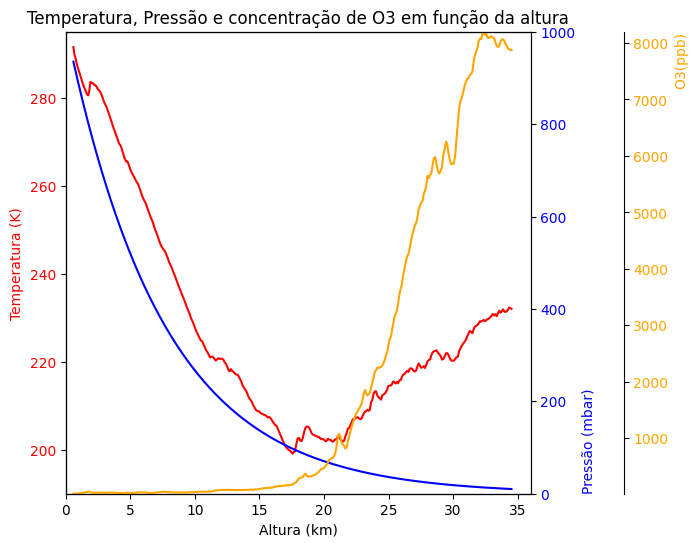

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,6))



ax2 = ax1.twinx()
ax3 = ax1.twinx()

####ax1
ax1.set_ylim([190, 295])
ax1.set_xlim(0, 36)
color = 'red'
ax1.set_ylabel('Temperatura (K)', color=color)
ax1.plot(df['z (km)'], df['temp(K)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Altura (km)')


##ax2

ax2.set_ylim([0, 1000])
color1 = "blue"
ax2.set_ylabel('Pressão (mbar)', color=color1, loc='bottom')
ax2.plot(df['z (km)'], df['Pressao (mbar)'], color=color1)
ax2.tick_params(axis='y', labelcolor=color1)

###ax3
ax3.set_ylim([19, 8200])
##cria um eixo secundário
ax3.spines['right'].set_position(("axes", 1.2))
color2 = "orange"
ax3.set_ylabel('O3(ppb)', color=color2, loc='top')
ax3.plot(df['z (km)'], df['O3 (ppb)'], color=color2)
ax3.tick_params(axis='y', labelcolor=color2)

plt.title('Temperatura, Pressão e concentração de O3 em função da altura')






plt.show()

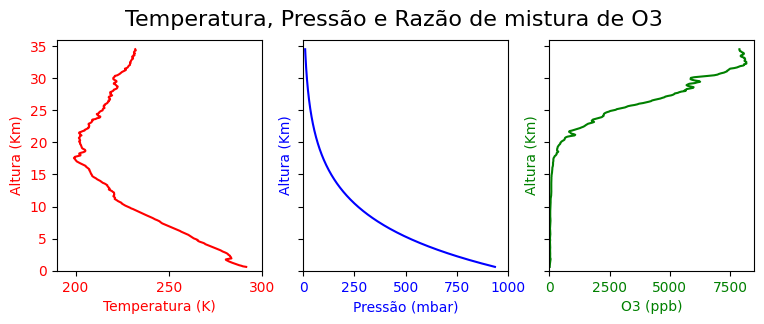

In [ ]:
from numpy.lib.arraypad import pad
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

##Plot de temperatura
color='red'
##Limites dos eixos y e x
ax[0].set_ylim([0, 36])
ax[0].set_xlim([190, 300])
##Plot
ax[0].plot(df['temp(K)'], df['z (km)'], color=color)
ax[0].set_ylabel('Altura (Km)', color=color)
ax[0].tick_params(axis='both', labelcolor=color)
ax[0].set_xlabel('Temperatura (K)', color=color)

##Plot de Pressão
color1='blue'
##Limites dos eixos y e x
ax[1].set_ylim([0, 36])
ax[1].set_xlim([0, 1000])
##Plot
ax[1].plot(df['Pressao (mbar)'], df['z (km)'], color=color1)
ax[1].set_ylabel('Altura (Km)', color=color1)
ax[1].tick_params(axis='both', labelcolor=color1)
ax[1].set_xlabel('Pressão (mbar)', color=color1)

##Plot de O3
color2='green'
##Limites dos eixos y e x
ax[2].set_ylim([0, 36])
ax[2].set_xlim([0, 8500])
##Plot
ax[2].plot(df['O3 (ppb)'], df['z (km)'], color=color2)
ax[2].set_ylabel('Altura (Km)', color=color2)
ax[2].tick_params(axis='both', labelcolor=color2)
ax[2].set_xlabel('O3 (ppb)', color=color2)

fig.suptitle('Temperatura, Pressão e Razão de mistura de O3', fontsize=16)

plt.show()